In [334]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [335]:
# Read monthly trade data
df_trade = pd.read_csv('../data/processed/monthly_TradeData.csv')

df_trade

,Period,ReporterISO,PartnerISO,PrimaryValue
0,2015-01-01,DZA,USA,2.628566e+03
1,2015-01-01,AGO,FRA,4.950500e+02
2,2015-01-01,AGO,NAM,2.426630e+03
3,2015-01-01,AGO,USA,6.091000e+01
4,2015-01-01,AZE,NLD,3.215760e+03
...,...,...,...,...
479213,2018-12-01,TWN,EGY,8.331526e+04
479214,2018-12-01,TWN,GBR,8.721823e+06
479215,2018-12-01,TWN,TZA,2.768410e+05
479216,2018-12-01,TWN,USA,3.439689e+08


In [336]:
# Display basic information about the DataFrame
print(df_trade.info())

# Display summary statistics
print(df_trade.describe())

# Display unique values in the 'reporting country' and 'partner country' columns
print(df_trade['ReporterISO'].unique())
print(df_trade['PartnerISO'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479218 entries, 0 to 479217
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Period        479218 non-null  object 
 1   ReporterISO   479218 non-null  object 
 2   PartnerISO    479218 non-null  object 
 3   PrimaryValue  479218 non-null  float64
dtypes: float64(1), object(3)
memory usage: 14.6+ MB
None
       PrimaryValue
count  4.792180e+05
mean   1.317264e+07
std    1.716269e+08
min    1.000000e-02
25%    3.162505e+03
50%    3.397438e+04
75%    5.128024e+05
max    1.551785e+10
['DZA' 'AGO' 'AZE' 'ARG' 'AUS' 'AUT' 'BHR' 'BRB' 'BEL' 'BOL' 'BIH' 'BWA'
 'BRA' 'BGR' 'BLR' 'CAN' 'CHL' 'COL' 'HRV' 'CYP' 'CZE' 'DNK' 'DOM' 'ECU'
 'SLV' 'ETH' 'EST' 'FIN' 'FRA' 'GEO' 'DEU' 'GHA' 'GRC' 'GTM' 'HUN' 'ISL'
 'IDN' 'IRL' 'ISR' 'ITA' 'CIV' 'JPN' 'KAZ' 'KOR' 'KWT' 'KGZ' 'LVA' 'LTU'
 'LUX' 'MDG' 'MYS' 'MLT' 'MEX' 'MDA' 'MAR' 'NLD' 'NZL' 'NIC' 'NOR' 'PER'
 'PHL' 'POL' 'PRT' 'ROU

In [337]:
# Group by reporting country and sum the trade values
trade_by_reporting_country = df_trade.groupby('ReporterISO')['PrimaryValue'].sum()

trade_by_reporting_country


ReporterISO
AGO    2.382276e+06
ALB    8.112405e+04
AND    4.096350e+07
ARE    8.434236e+08
ARG    9.510113e+06
           ...     
WSM    4.518200e+01
YEM    5.530604e+03
ZAF    2.572285e+08
ZMB    2.960566e+05
ZWE    4.144280e+04
Name: PrimaryValue, Length: 146, dtype: float64

In [338]:
# Group by partner country and sum the trade values
trade_by_partner_country = df_trade.groupby('PartnerISO')['PrimaryValue'].sum()

trade_by_partner_country


PartnerISO
AFG    4.028110e+07
AGO    3.426192e+07
ALB    3.117189e+07
AND    1.537717e+08
ARE    3.107950e+09
           ...     
WSM    1.376258e+06
YEM    3.363093e+06
ZAF    1.852087e+09
ZMB    1.209113e+07
ZWE    1.243471e+07
Name: PrimaryValue, Length: 192, dtype: float64

In [339]:
# Sort and get top 10 reporting countries by trade value
top_reporting_countries = trade_by_reporting_country.sort_values(ascending=False).head(10)

top_reporting_countries


ReporterISO
TWN    2.026319e+12
SGP    8.432283e+11
KOR    5.830200e+11
CHN    5.489592e+11
USA    5.235358e+11
MYS    4.157407e+11
JPN    3.613571e+11
DEU    1.997257e+11
PHL    1.872030e+11
NLD    9.321387e+10
Name: PrimaryValue, dtype: float64

In [340]:
# Sort and get top 10 partner countries by trade value
top_partner_countries = trade_by_partner_country.sort_values(ascending=False).head(10)

top_partner_countries


PartnerISO
CHN    2.048375e+12
SGP    6.443901e+11
TWN    5.149878e+11
KOR    4.297851e+11
MYS    4.150223e+11
USA    3.128689e+11
JPN    2.901203e+11
VNM    2.798642e+11
DEU    1.925560e+11
MEX    1.649534e+11
Name: PrimaryValue, dtype: float64

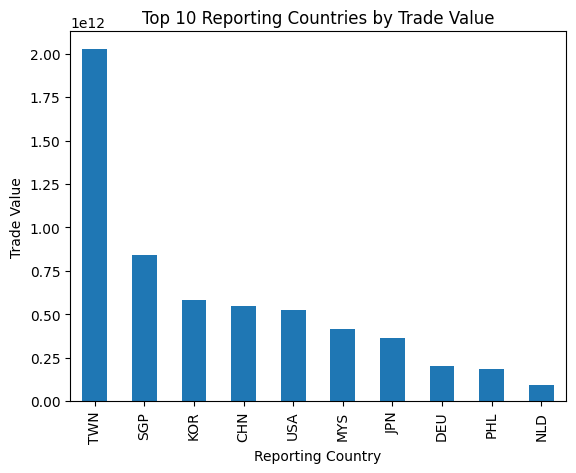

In [341]:
import matplotlib.pyplot as plt

# Bar plot
top_reporting_countries.plot(kind='bar', title='Top 10 Reporting Countries by Trade Value')
plt.xlabel('Reporting Country')
plt.ylabel('Trade Value')
plt.show()


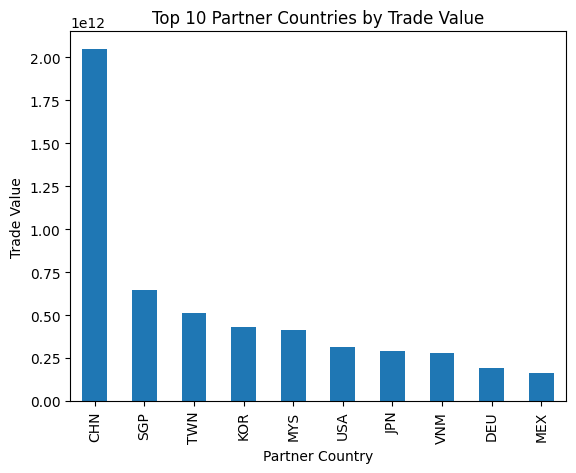

In [342]:
# Bar plot
top_partner_countries.plot(kind='bar', title='Top 10 Partner Countries by Trade Value')
plt.xlabel('Partner Country')
plt.ylabel('Trade Value')
plt.show()


In [343]:

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Period' to datetime format
df_trade['Period'] = pd.to_datetime(df_trade['Period'])

# Set date as index
df_trade.set_index('Period', inplace=True)

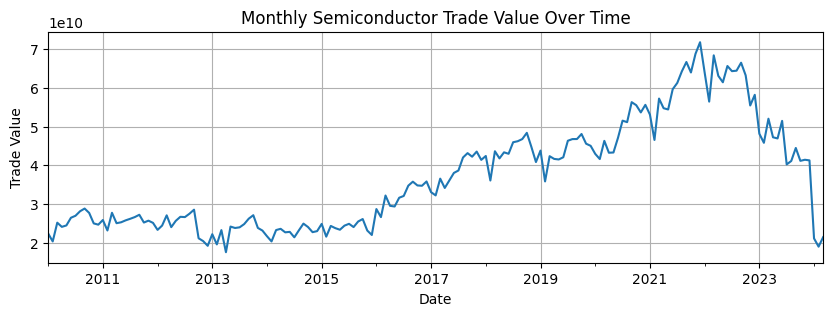

In [344]:
# Resample and aggregate trade values by month
monthly_trade = df_trade.resample('M')['PrimaryValue'].sum()

# Plot trend over time
plt.figure(figsize=(10, 3))  # Optional: Set figure size for better readability
monthly_trade.plot(title='Monthly Semiconductor Trade Value Over Time')
plt.xlabel('Date')
plt.ylabel('Trade Value')
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

In [345]:
monthly_trade = monthly_trade.to_frame()
monthly_trade.to_csv('../data/processed/monthly_WorldTrade.csv')

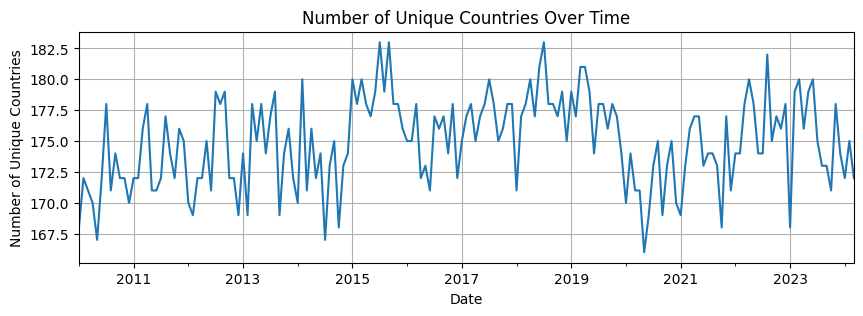

In [346]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the integer column to datetime format
#df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')

# Define a function to calculate the number of unique countries
def unique_countries_per_period(df):
    # Combine PartnerISO and ReporterISO into one series and get unique values
    combined = df[['PartnerISO', 'ReporterISO']].stack().unique()
    return len(combined)

# Group by period and apply the function
unique_countries = df_trade.groupby(df_trade.index.to_period('M')).apply(unique_countries_per_period)

# Plot the trend over time
plt.figure(figsize=(10, 3))  # Optional: Set figure size for better readability
unique_countries.plot(title='Number of Unique Countries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Countries')
plt.grid(True)  # Optional: Add grid for better readability
plt.show()


In [347]:
unique_countries

Period
2010-01    168
2010-02    172
2010-03    171
2010-04    170
2010-05    167
          ... 
2023-11    178
2023-12    174
2024-01    172
2024-02    175
2024-03    172
Freq: M, Length: 171, dtype: int64

# Remove small trade values using IQR methods
the Interquartile Range (IQR) method is a robust technique for detecting and removing outliers, especially in datasets that are right-skewed. The IQR method works well because it does not assume a normal distribution and is less affected by extreme values compared to methods like Z-scores.
Apply a log transformation to the trade values to make the data distribution more normal. This is especially useful if your data has a skewed distribution.

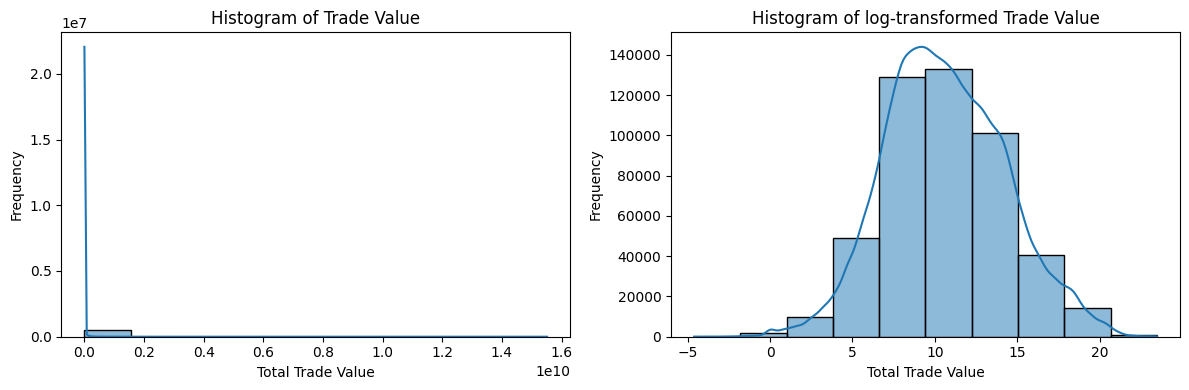

In [348]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Apply log transformation to the trade values
df_trade['LogTradeValue'] = np.log(df_trade['PrimaryValue'])

# Plot Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_trade['PrimaryValue'], bins=10, kde=True)
plt.title('Histogram of Trade Value')
plt.xlabel('Total Trade Value')
plt.ylabel('Frequency')

# Plot Box Plot
plt.subplot(1, 2, 2)
sns.histplot(df_trade['LogTradeValue'], bins=10, kde=True)
plt.title('Histogram of log-transformed Trade Value')
plt.xlabel('Total Trade Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [349]:

# Step 2: Calculate IQR for the TotalTradeValue
Q1 = df_trade['LogTradeValue'].quantile(0.25)
Q3 = df_trade['LogTradeValue'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
df_trade_filtered = df_trade[ (df_trade['LogTradeValue'] >= lower_bound)]


In [350]:
df_trade_filtered = df_trade_filtered[['ReporterISO','PartnerISO','PrimaryValue']]
# df_trade_filtered.to_csv('../data/processed/df_trade_filtered.csv')
df_trade_filtered

,ReporterISO,PartnerISO,PrimaryValue
Period,,,
2015-01-01,DZA,USA,2.628566e+03
2015-01-01,AGO,FRA,4.950500e+02
2015-01-01,AGO,NAM,2.426630e+03
2015-01-01,AGO,USA,6.091000e+01
2015-01-01,AZE,NLD,3.215760e+03
...,...,...,...
2018-12-01,TWN,EGY,8.331526e+04
2018-12-01,TWN,GBR,8.721823e+06
2018-12-01,TWN,TZA,2.768410e+05


### Network
Construct network of each period
Remove unimportant nodes (comparison)

In [379]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a graph
G = nx.Graph()

# Add nodes and edges with trade values
for _, row in df_trade.iterrows():
    G.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])


In [380]:
# Get degrees of nodes
degrees = dict(G.degree())
weighted_degrees = {node: sum(df_trade['PrimaryValue'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}

# Convert degrees to a list
weighted_degrees_values = list(weighted_degrees.values())

# Calculate the 25th percentile of degrees
percentile_25th = np.percentile(weighted_degrees_values, 25)

# Print the threshold for reference
print(f"25th Percentile Degree Threshold: {percentile_25th}")


25th Percentile Degree Threshold: 166618.79324999976


In [376]:
# Get degrees of nodes
degrees = dict(G.degree())
    
# Convert degrees to a list
degree_values = list(degrees.values())

# Calculate the 25th percentile of degrees
percentile_25th = np.percentile(degree_values, 25)

# Print the threshold for reference
print(f"25th Percentile Degree Threshold: {percentile_25th}")

# Plot histogram of node degrees
plt.figure(figsize=(10, 3))
plt.hist(degree_values, bins=range(1, max(degree_values) + 1), edgecolor='black', alpha=0.7)
plt.axvline(percentile_25th, color='red', linestyle='dashed', linewidth=1, label=f'25th Percentile ({percentile_25th:.2f})')
plt.title('Histogram of Node Degrees')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1000x300 with 0 Axes>

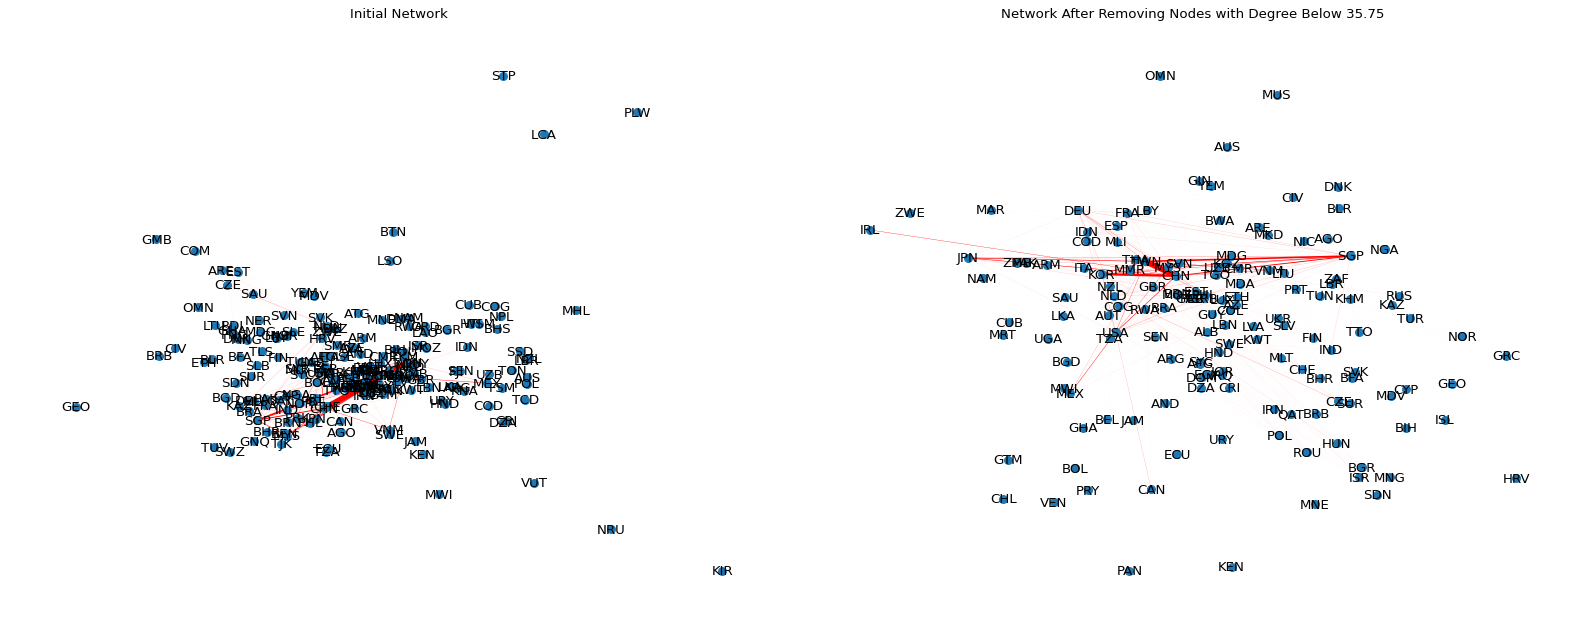

In [353]:
# Nodes to be removed based on the percentile threshold
nodes_to_remove = [node for node, degree in degrees.items() if degree < percentile_25th]

# Function to plot network on specific axes
def plot_network(ax, G, title, pos=None):
    if pos is None:
        pos = nx.spring_layout(G, seed=42)  # Positioning nodes using a spring layout
    
    # Extract edge weights for scaling link widths
    edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
    max_edge_weight = max(edge_weights) if edge_weights else 1  # Avoid division by zero
    edge_widths = [width / max_edge_weight * 5 for width in edge_weights]
    
    # Draw the network
    nx.draw(G, pos, node_size=50, edge_color='red', width=edge_widths, with_labels=True, ax=ax)
    ax.set_title(title)

# Plot the initial network and network after removing nodes side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=80)

# Plot the initial network
plot_network(axes[0], G, 'Initial Network')

# Remove nodes
G_removed = G.copy()
G_removed.remove_nodes_from(nodes_to_remove)

# Plot the network after removing nodes
plot_network(axes[1], G_removed, f'Network After Removing Nodes with Degree Below {percentile_25th:.2f}')

plt.tight_layout()
plt.show()

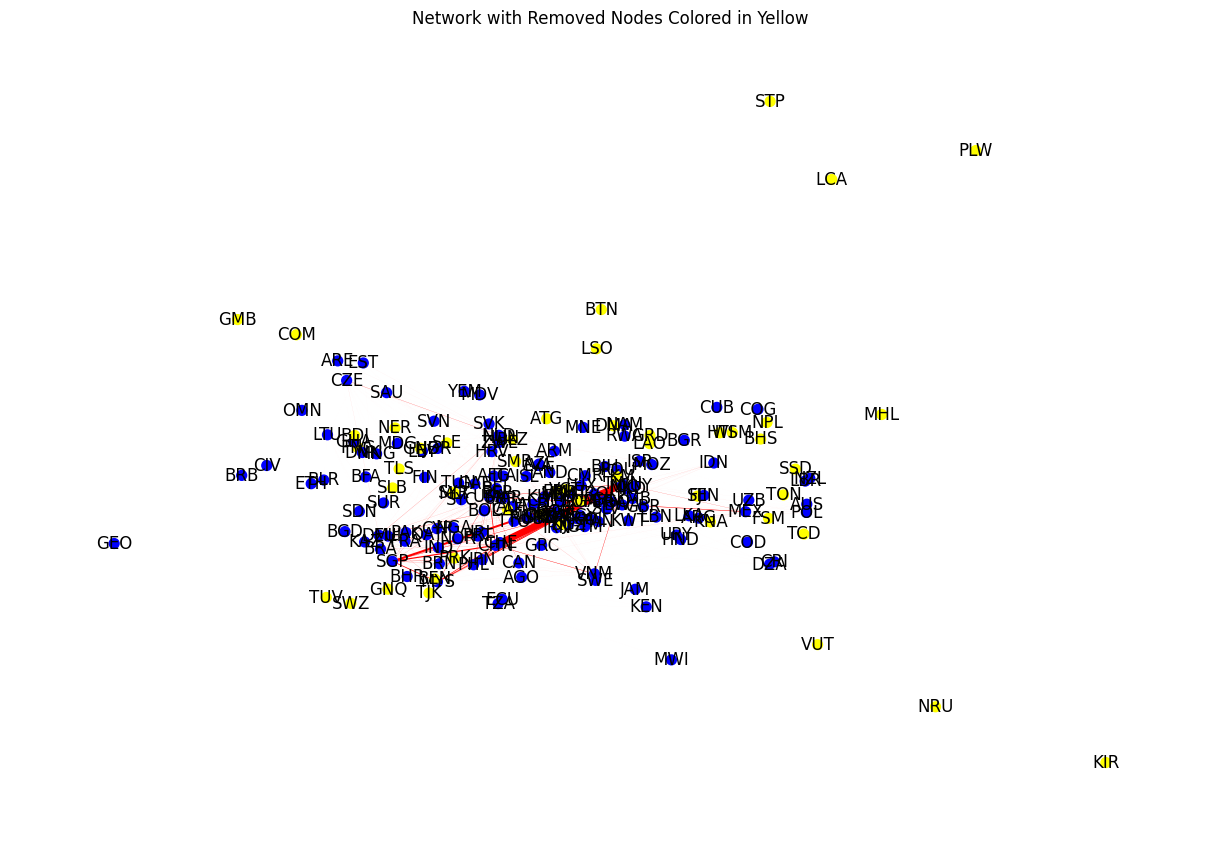

In [354]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Nodes to be removed based on the percentile threshold
nodes_to_remove = [node for node, degree in degrees.items() if degree < percentile_25th]

# Define node color based on whether the node is removed or not
node_colors = ['yellow' if node in nodes_to_remove else 'blue' for node in G.nodes()]

# Set up the plot
plt.figure(figsize=(12, 8))

# Positioning nodes using a spring layout
pos = nx.spring_layout(G, seed=42)

# Extract edge weights for scaling link widths
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
max_edge_weight = max(edge_weights) if edge_weights else 1  # Avoid division by zero
edge_widths = [width / max_edge_weight * 5 for width in edge_weights]

# Draw the network
nx.draw(G, pos, node_size=50, edge_color='red', width=edge_widths, with_labels=True, node_color=node_colors)
plt.title('Network with Removed Nodes Colored in Yellow')
plt.show()

In [355]:
# Print the nodes that were removed
print(f"Removed nodes: {nodes_to_remove}")

# Delete rows where source is in the list of countries
df_trade_removed = df_trade_filtered[~df_trade_filtered['ReporterISO'].isin(nodes_to_remove)]
# # # Delete rows where target is in the list of countries
df_trade_removed = df_trade_removed[~df_trade_removed['PartnerISO'].isin(nodes_to_remove)]

Removed nodes: ['FJI', 'NRU', 'PNG', 'TUV', 'BHS', 'SLE', 'GRD', 'SOM', 'HTI', 'SSD', 'NER', 'NPL', 'SMR', 'TKM', 'BEN', 'LAO', 'BDI', 'CAF', 'TCD', 'GNQ', 'GNB', 'DMA', 'DJI', 'WSM', 'PRK', 'CPV', 'STP', 'TJK', 'BTN', 'LSO', 'SWZ', 'SYR', 'KIR', 'VCT', 'KNA', 'SLB', 'VUT', 'ATG', 'GMB', 'BLZ', 'TLS', 'COM', 'LCA', 'ERI', 'FSM', 'MHL', 'TON', 'PLW']


In [356]:
df_trade_removed # records decrease from 477993 to 466812


,ReporterISO,PartnerISO,PrimaryValue
Period,,,
2015-01-01,DZA,USA,2.628566e+03
2015-01-01,AGO,FRA,4.950500e+02
2015-01-01,AGO,NAM,2.426630e+03
2015-01-01,AGO,USA,6.091000e+01
2015-01-01,AZE,NLD,3.215760e+03
...,...,...,...
2018-12-01,TWN,EGY,8.331526e+04
2018-12-01,TWN,GBR,8.721823e+06
2018-12-01,TWN,TZA,2.768410e+05


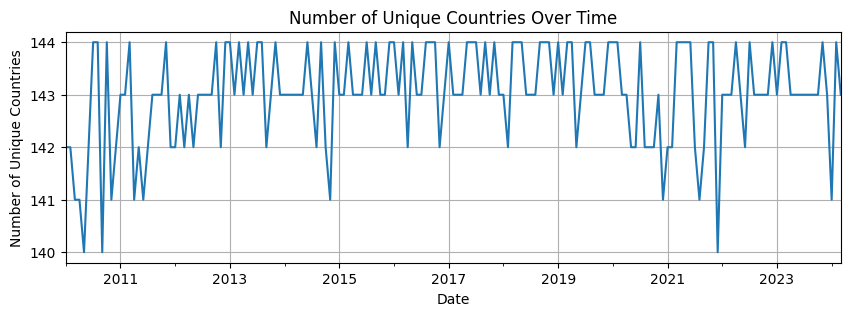

In [362]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the integer column to datetime format
#df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')

# Define a function to calculate the number of unique countries
def unique_countries_per_period(df):
    # Combine PartnerISO and ReporterISO into one series and get unique values
    combined = df[['PartnerISO', 'ReporterISO']].stack().unique()
    return len(combined)

# Group by period and apply the function
unique_countries_removed = df_trade_removed.groupby(df_trade_removed.index.to_period('M')).apply(unique_countries_per_period)

# Plot the trend over time
plt.figure(figsize=(10, 3))  # Optional: Set figure size for better readability
unique_countries_removed.plot(title='Number of Unique Countries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Countries')
plt.grid(True)  # Optional: Add grid for better readability
plt.show()


In [363]:
df_trade_removed.to_csv('../data/processed/df_trade_removed.csv', index=True)
